In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris_data = pd.read_excel('/content/iris.xls')

In [5]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = iris_data.drop('Classification', axis=1)
Y = iris_data['Classification']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
accuracy_dict= {}

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [23]:
from sklearn.metrics import accuracy_score

In [26]:
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_dict[name] = accuracy
    print(f"Accuracy of {name}: {accuracy}")

Accuracy of Logistic Regression: 1.0
Accuracy of Decision Tree: 1.0
Accuracy of Random Forest: 1.0
Accuracy of Support Vector Machine: 1.0


In [27]:
best_model = max(accuracy_dict, key=accuracy_dict.get)
print(f"\nBest performing model: {best_model} with accuracy: {accuracy_dict[best_model]}")


Best performing model: Logistic Regression with accuracy: 1.0


<Axes: >

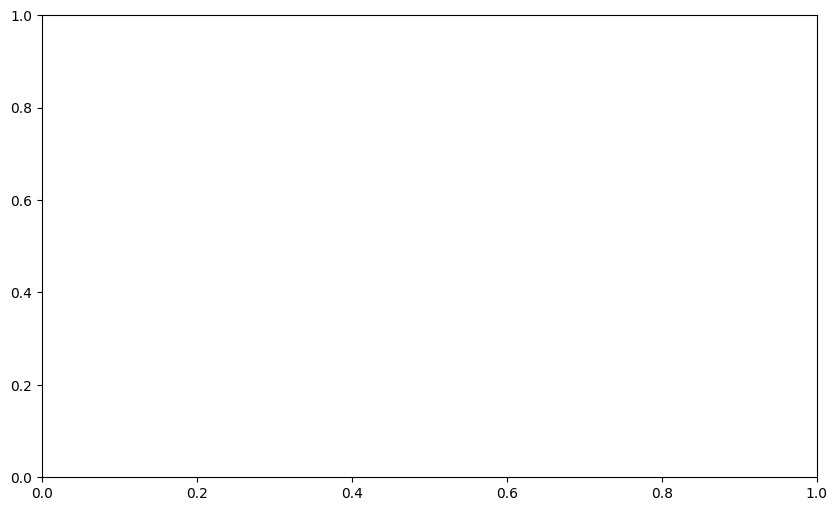

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(X=list(accuracy_dict.keys()), Y=list(accuracy_dict.values()))

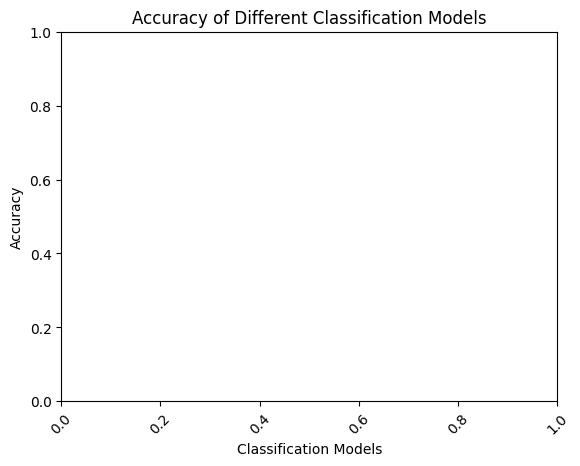

In [32]:
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.xticks(rotation=45)
plt.show()

In [35]:
from sklearn.metrics import classification_report

In [36]:
print("\nClassification Report for the Best Model:")
print(classification_report(Y_test, models[best_model].predict(X_test_scaled)))


Classification Report for the Best Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

